In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gmean



In [2]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    pareto=population_ids[pareto_front]
    pareto_front = scores[pareto]
    pareto_front_df = pd.DataFrame(pareto_front)
    pareto_front_df.sort_values(0, inplace=True)
    pareto_front = pareto_front_df.values
    # Return ids of scenarios on pareto front
    x_all = scores[:, 0]
    y_all = scores[:, 1]
    x_pareto = pareto_front[:, 0]
    y_pareto = pareto_front[:, 1]

    plt.scatter(x_all, y_all)
    plt.plot(x_pareto, y_pareto, color='r')
    plt.xlabel('Objective A')
    plt.ylabel('Objective B')
    plt.show()
    return pareto_front

In [3]:
def max_gmean(scores):
    pp=[]
    for i in range(len(scores)):
        pp.append(gmean(scores[i]))
    return pp.index(max(pp))

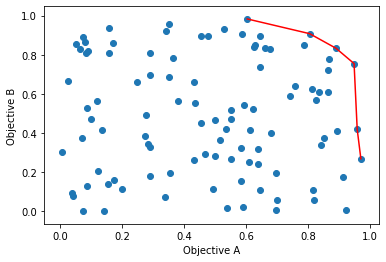

True


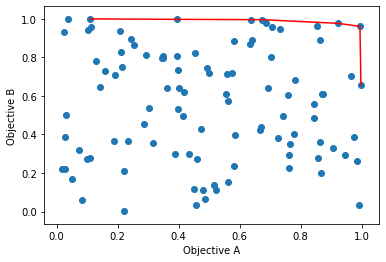

True


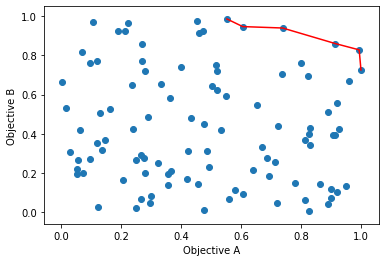

True


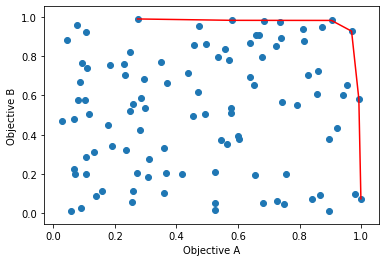

True


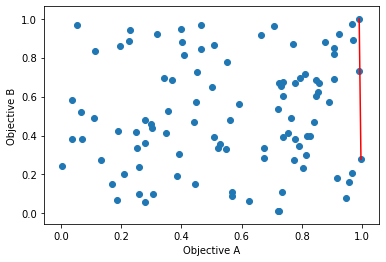

True


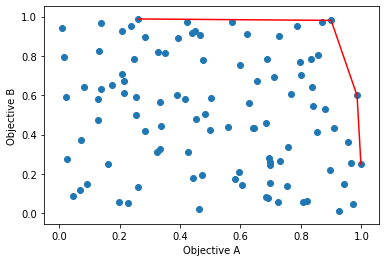

True


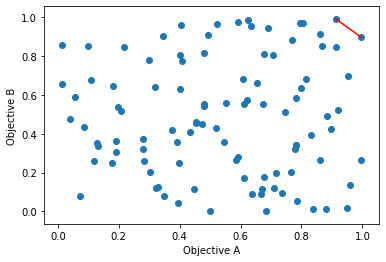

True


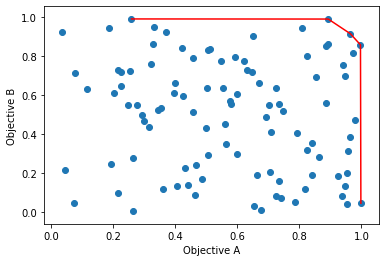

True


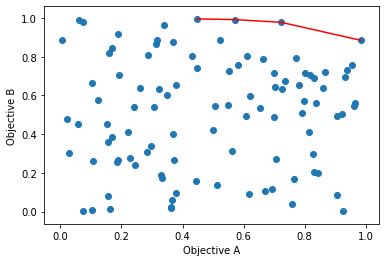

True


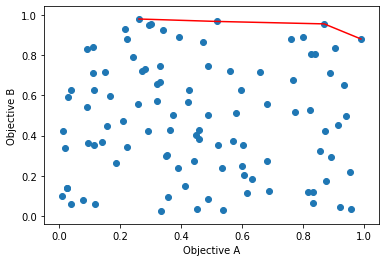

True


In [9]:
for e in range(10):
    scores=np.random.rand(100, 2)
    pareto_front=identify_pareto(scores)
    index_max=max_gmean(scores)
    print(scores[index_max] in pareto_front)

